<a href="https://colab.research.google.com/github/hmobley/dlgo/blob/main/Part_2_DataAcquisitionAndPreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data set 1: a time-series of cloudless sentinel-2 imagery

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

/bin/bash: nvidia-smi: command not found


In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import time
tic = time.perf_counter()

In [6]:
# testing to see if saving in github
#!cd drive/MyDrive/satellite/
import os
base_dir = 'drive/MyDrive/satellite'
base_data = os.path.join(base_dir,'data')
s2_data = os.path.join(base_data,'s2cloudless_imagery')
nwpu_data = os.path.join(base_data,'nwpu_images')
custom_data = os.path.join(base_data,'custom')
#os.path.exists(base_dir)
# print(s2_data)
# print(nwpu_data)
# print(custom_data)

In [7]:
def make_dir(dirpath):
    if not os.path.exists(dirpath):
        os.mkdir(dirpath)
        print(F"{dirpath} created")

In [8]:
# set up directories, as needed
make_dir(base_data)
make_dir(s2_data)
make_dir(nwpu_data)
make_dir(custom_data)

In [9]:
s2_data_exists = not not os.listdir(s2_data)
nwpu_data_exists = not not os.listdir(nwpu_data)
custom_data_exists = not not os.listdir(custom_data)
print(F"s2: {s2_data_exists}")
print(F"nwpu: {nwpu_data_exists}")
print(F"custom: {custom_data_exists}")

s2: True
nwpu: True
custom: False


In [10]:
# define all the parameters
root = "https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&"
layers = 'layers=s2cloudless-2018&'
bbox = 'bbox=10.232263646327286,-0.670557747166987,10.334917149745255,-0.5679042437490183&'
width = 'width=4096&'
height = 'height=4096&'
srs = 'srs=epsg:4326'

# define the output
destination = 'example_image.jpg'

#construct and print the url
url = root+layers+bbox+width+height+srs
print(url)

https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&layers=s2cloudless-2018&bbox=10.232263646327286,-0.670557747166987,10.334917149745255,-0.5679042437490183&width=4096&height=4096&srs=epsg:4326


In [11]:
import urllib.request
urllib.request.urlretrieve(url, destination)

('example_image.jpg', <http.client.HTTPMessage at 0x7fc6da092be0>)

In [12]:
!pwd

/content


In [13]:
import os
os.remove(destination)

In [14]:
# #Lake Poopo, Bolivia
# site='poopo'
# # bbox = 'bbox=-68.66848367000537,-19.687928531849003,-66.67924128546656,-17.8774477409051&'
# # width = 'width=4096&'
# # height = 'height=4096&'
# # layers = ['layers=s2cloudless&', 'layers=s2cloudless-2018&']
# # srs = 'srs=epsg:4326' bbox = '-68.66848367000537,-19.687928531849003,-66.67924128546656,-17.8774477409051'
# width = '4096'
# height = '4096'
# layers = ['s2cloudless', 's2cloudless-2018']
# srs = 'epsg:4326'

In [15]:
# layer = 'layers=s2cloudless&'
# site+'_'+layer.split('=')[-1].split('&')[0]+'.jpg'

In [16]:
def make_filename(site, layer):
    return F"{site}_{layer}.jpg"

In [17]:
#download_all_layers(root,layers,bbox,width,height,srs,site)

In [18]:
year_layers = {2016:'s2cloudless',
               2017:'s2cloudless-2017',
               2018:'s2cloudless-2018'}

In [19]:
# layer='s2cloudless-2018'
# print(height)
# print(width)
# print(F"{root}layers={layer}&bbox={bbox}&width={width}&height={height}&srs={srs}")

In [20]:
import urllib.request
def download_all_layers(root,layers,bbox,width,height,srs,site):
    #cycle through each layer to download
    layers = [year_layers[x] for x in layers]
    for layer in layers:
        # construct a URL string 
        url = F"{root}layers={layer}&bbox={bbox}&width={width}&height={height}&srs={srs}"
        display(url)
        dest_filename = make_filename(site,layer)
        display(dest_filename)
        #download into a filename constructed as "site_layer.jpg"
        #+urllib.request.urlretrieve(url, site+'_'+layer.split('=')[-1].split('&')[0]+'.jpg')
        urllib.request.urlretrieve(url, dest_filename)

In [21]:
# test = [2016,2017,2018]
# [year_layers[x] for x in test]

In [22]:
width = 4096
height = 4096
images = [{'site':'poopo', # Lake Poopo, Bolivia
           'bbox':'-68.66848367000537,-19.687928531849003,-66.67924128546656,-17.8774477409051',
           'width':width,'height':height,
           'layers':[2016,2018]},
           {'site':'urmia',  # Lake Urmia, Iran
           'bbox':'44.587725529095295,36.86436828406643,46.230181583782795,38.50682433875393',
           'width':width,'height':height,
           'layers':[2016,2017,2018]},
          {'site':'mead_mojave', # Lake Mead/ Lake Mojave, USA
           'bbox':'-115.42507235769445,34.94273489926993,-113.78261630300695,36.58519095395743',
           'width':width,'height':height,
           'layers':[2016,2018]},
          {'site':'aral_sea', # Aral Sea, Kazahkstan
           'bbox':'58.032853536637845,43.955292007325,61.317765646012845,47.2402041167',
           'width':width,'height':height,
           'layers':[2016,2018]},
          {'site':'copais', # Copais Lake, Greece
           'bbox':'23.214268551013436,38.36067354565393,23.350911007068124,38.4633270490719',
           'width':width,'height':height,
           'layers':[2016,2017,2018]},
          {'site':'ramganga', # Ramganga Lake, India
           'bbox':'78.63716910452058,29.468167756293038,78.91045401662996,29.673474763128976',
           'width':width,'height':height,
           'layers':[2016,2018]},
          {'site':'qinghai', # Qinghai Lake, China 
           'bbox':'99.56471967977474,35.70094613663666,101.20168257039974,37.34340219132416',
           'width':width,'height':height,
           'layers':[2016,2018]},
          {'site':'salton_sea', # Salton Sea, USA 
           'bbox':'-116.21928854749297,32.903320741965295,-115.40080710218047,33.724548769309045',
           'width':width,'height':height,
           'layers':[2016,2018]},
          {'site':'faguibine', # Lake Faguibine, Mali
           'bbox':'-4.656089323623854,14.959306189862815,-3.0191264329988536,16.601762244550315',
           'width':4082,'height':height,
           'layers':[2016,2018]},
          {'site':'mono', # Mono Lake, USA
           'bbox':'-119.22357779576633,37.797192162208084,-118.81433707311008,38.20780617587996',
           'width':4082,'height':height,
           'layers':[2016,2018]},
          {'site':'walker', # Walker Lake, USA
           'bbox':'-118.82841344222616,38.58649115903216,-118.62379308089804,38.791798165868094',
           'width':4082,'height':height,
           'layers':[2016,2018]},
          {'site':'balaton', # Lake Balaton, Hungary
           'bbox':'17.138306471163226,46.438781725159295,18.231446119600726,47.260009752503045',
           'width':4096,'height':3084,
           'layers':[2016,2017,2018]},
          {'site':'koroneia', # Lake Koroneia, Greece
           'bbox':'23.34167375183668,40.56321556296156,23.614958663946055,40.7685225697975',
           'width':4096,'height':3084,
           'layers':[2016,2017,2018]},
          {'site':'salda', # Lake Salda, Turkey
           'bbox':'29.6337346568769,37.49763563391751,29.736044837540963,37.60028913733548',
           'width':4082,'height':4096,
           'layers':[2016,2017,2018]},
          {'site':'burdur', # Lake Burdur, Turkey
           'bbox':'30.008970333642345,37.6345355820376,30.373579098290783,37.83984258887354',
           'width':4096,'height':2312,
           'layers':[2016,2017,2018]},
          {'site':'mendocino', # Lake Mendocino, USA
           'bbox':'-123.19613698824355,39.189371563341254,-123.14498189791152,39.24069831505024',
           'width':4082,'height':4096,
           'layers':[2016,2018]},
          {'site':'elephant_butte', # Elephant Butte Reservoir, USA
           'bbox':'-107.23803910498334,33.14614806405013,-107.13572892431928,33.2488015674681',
           'width':4082,'height':4096,
           'layers':[2016,2018]},
          ]
#download_all_layers(root,layers,bbox,width,height,srs,'urmia')

In [23]:
# clean up files
# for info in images:
#     for layer in info["layers"]:
#         try:
#             os.remove(make_filename(info["site"],layer))
#         except OSError:
#             pass

In [24]:
# !ls

In [25]:
root = "https://tiles.maps.eox.at/wms?service=wms&request=getmap&version=1.1.1&"
srs = 'epsg:4326'

if not s2_data_exists:
    for info in images:
        download_all_layers(root,info['layers'],info['bbox'],width,height,srs,info['site'])

In [26]:
!ls

drive  sample_data


In [27]:
## create a directory to move the images into. It is wrapped in a "try:except" loop 
## in case you have run this cell before and want to avoid errors
# basepath = 's2cloudless_imagery'
# datapath = os.path.join(basepath,'data')
# print(datapath)
# #!ls
# try:
#     os.mkdir(basepath)
#     os.mkdir(datapath)
# except:
#     pass

In [28]:
import shutil, glob, os
if not s2_data_exists:
    # cycle through each jpg image in the current directory
    try:
        for f in glob.glob('*.jpg'):
            #move to the new directory
            if f.endswith('s2cloudless.jpg'): #2016 imagery
                shutil.move(f, os.path.join(s2_data,f.replace('s2cloudless.jpg','s2cloudless-2016.jpg')))
            else: #2017 or 2018 imagery
                shutil.move(f, s2_data)
    except:
        display('error')
        pass

In [29]:
# get a sorted list of all jpg files
filepaths = os.path.join(s2_data,'*.jpg')
files = sorted(glob.glob(filepaths))
# define a list of sites
sites = ['aral_sea','balaton','burdur','copais','elephant_butte',
         'faguibine','koroneia','mead_mojave','mendocino','mono',
         'poopo','qinghai','ramganga','salda','urmia','walker']

In [30]:
#allocate F which will contain a list of file name lists
F = []
#cycle through each of the 17 sites
for site in sites:
    # append those files at each site
    F.append([f for f in files if f.startswith(os.path.join(s2_data,site))])

In [31]:
!pip install rasterio
import rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 51.9 MB/s eta 0:00:00


In [32]:
F_arrays = [] #initialize empty list
for f in F: #cycle through sites
    tmp = [] #make a temporary empty list
    for i in f: #cycle through files at each site
        with rasterio.open(i) as dataset: #open the file
            tmp.append(dataset.read().T) #read in and transpose channels
    F_arrays.append(tmp) #add to F_arrays

/usr/local/lib/python3.9/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [33]:
import matplotlib.pyplot as plt

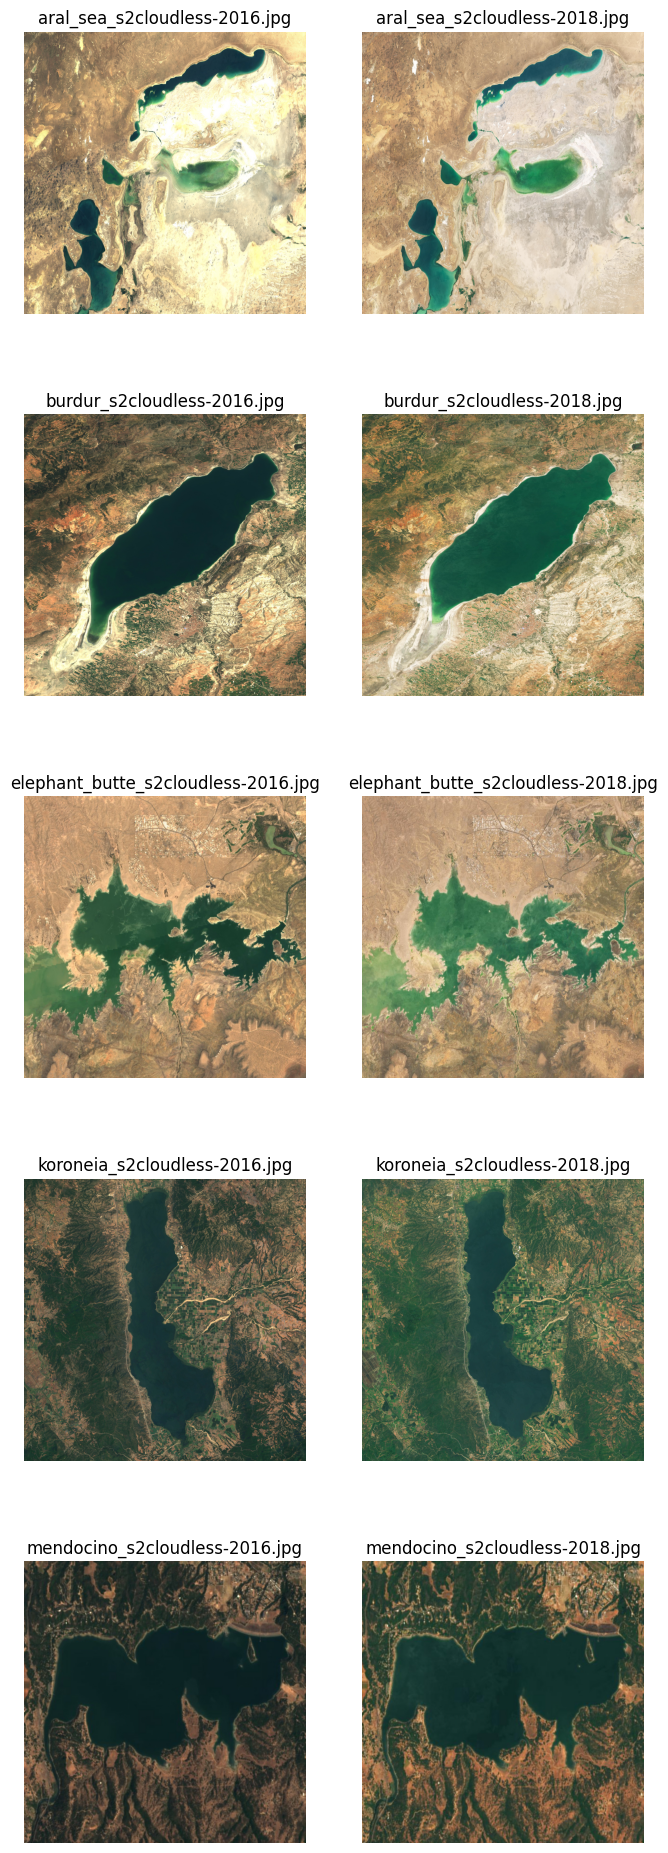

In [34]:
%matplotlib inline

# visualize some of the examples
fig = plt.figure(figsize=(8,24))
for i in range(1,10,2):
    plt.subplot(5,2,i)
    plt.imshow(F_arrays[i-1][0])
    plt.title(F[i-1][0].split(os.sep)[-1])
    plt.axis('off')
    plt.subplot(5,2,i+1)
    plt.imshow(F_arrays[i-1][-1])
    plt.title(F[i-1][-1].split(os.sep)[-1])
    plt.axis('off')
plt.show()

### Data set 2: NWPU-RESISC45 dataset of land covers and uses

In [35]:
# def download_file_from_google_drive(id, destination):
#     # original URL = "https://docs.google.com/uc?export=download"
#     # confirm URL = "https://docs.google.com/uc?export=download&confirm=1"
#     URL = "https://docs.google.com/uc"

#     session = requests.Session()

#     response = session.get(URL, params = { 'id' : id }, stream = True)
#     #response = session.get(URL, params = { 'id' : id, 'export' : 'download', 'confirm' : 1 }, stream = True)
#     print(response)
#     token = get_confirm_token(response)
#     print(token)
#     params = {'export':'download', 'id':id, 'confirm':1}
#     # if token:
#     #     params = { 'id' : id, 'confirm' : token }
#     #     response = session.get(URL, params = params, stream = True)
#     # else:
#     #     params = {'export':'download', 'id':id, 'confirm':1}
#     if token:
#         params['confirm'] = token
#     response = session.get(URL, params = params, stream=True)
#     print(response)

#     save_response_content(response, destination)    

# def get_confirm_token(response):
#     for key, value in response.cookies.items():
#         if key.startswith('download_warning'):
#             return value

#     return None

# def save_response_content(response, destination):
#     """
#     response = filename for input
#     destination = filename for output
#     """    
#     CHUNK_SIZE = 32768

#     with open(destination, "wb") as f:
#         for chunk in response.iter_content(CHUNK_SIZE):
#             if chunk: # filter out keep-alive new chunks
#                 f.write(chunk)

In [36]:
# from https://stackoverflow.com/questions/38511444/python-download-files-from-google-drive-using-url
import requests

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    print(response)
    token = get_confirm_token(response)
    print(token)
    params = {'export':'download', 'id':id, 'confirm':1}
    if token:
        params['confirm'] = token
    response = session.get(URL, params = params, stream=True)
    print(response)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    """
    response = filename for input
    destination = filename for output
    """    
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

In [37]:
# file_id = '14kkcuU6wd9UMvjaDrg3PNI-e_voCi8HL' # original project file, no longer exists
# #file_id = '1ME-ii1rYreNUL7Cki52Yu2LqJgwquZGm' # a dummy file in my google drive
# destination = 'NWPU_images.zip'
# download_file_from_google_drive(file_id, destination)

In [38]:
# now have a rar file rather than a zip file. The file had apparently been moved 
# from the google drive where it had been shared to a OneDrive location.  
# I downloaded to my computer, then uploaded to my google drive account (and 
# dropped the '(1)' part in the name), where I shared it with the id I am 
# using below:
#file_id = '1Me3xesha498d9mghDDsbSczRgWIICcrR'
file_id = '1102uMckINc75cshHhYqAGH-4BWUatKCv'  # file: satellite/NWPU_images_shared_do_not_delete.rar
destination = 'NWPU_images.rar'
if not nwpu_data_exists and os.path.exists(destination):
    download_file_from_google_drive(file_id, destination)

In [39]:
#!ls -la 
#!ls -ld NWPU*.rar

In [40]:
# unrar using code found as an answer to this stackoverflow question:
# https://stackoverflow.com/questions/17614467/how-can-unrar-a-file-with-python
!pip install patool
import patoolib
if not nwpu_data_exists and os.path.exists(destination):
    patoolib.extract_archive(destination, outdir=".")
    if not os.path.exists(os.path.join(base_dir,destination)):
        shutil.move(destination,base_dir)
    else:
        os.remove(destination)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 KB 3.0 MB/s eta 0:00:00


In [41]:
if not nwpu_data_exists:
    nwpu_dir = 'NWPU-RESISC45'
    subdirecs = [x[0] for x in os.walk(nwpu_dir)][1:]
    to_delete = [s for s in subdirecs if 'lake' not in s]
    for k in to_delete:
        shutil.rmtree(k, ignore_errors=True) 
    #tmp = 'nwpu_images'
    #os.rename(nwpu_dir,tmp)
    #nwpu_dir = tmp
    #nwpu_data = os.path.join(nwpu_dir,'data')
    #os.rename(os.path.join(nwpu_dir,'lake'),nwpu_data)
    # os.rename(os.path.join(nwpu_dir,'lake'),nwpu_data)
    try:
        #print(os.path.join(nwpu_dir,'lake','*.jpg'))
        for f in glob.glob(os.path.join(nwpu_dir,'lake','*.jpg')):
            #print(f)
            #move to the new directory
            shutil.move(f, nwpu_data)
    except:
        display('error')
        pass

In [42]:
#F_arrays
#[a[1].shape for a in F_arrays]
#help(plt.subplot)

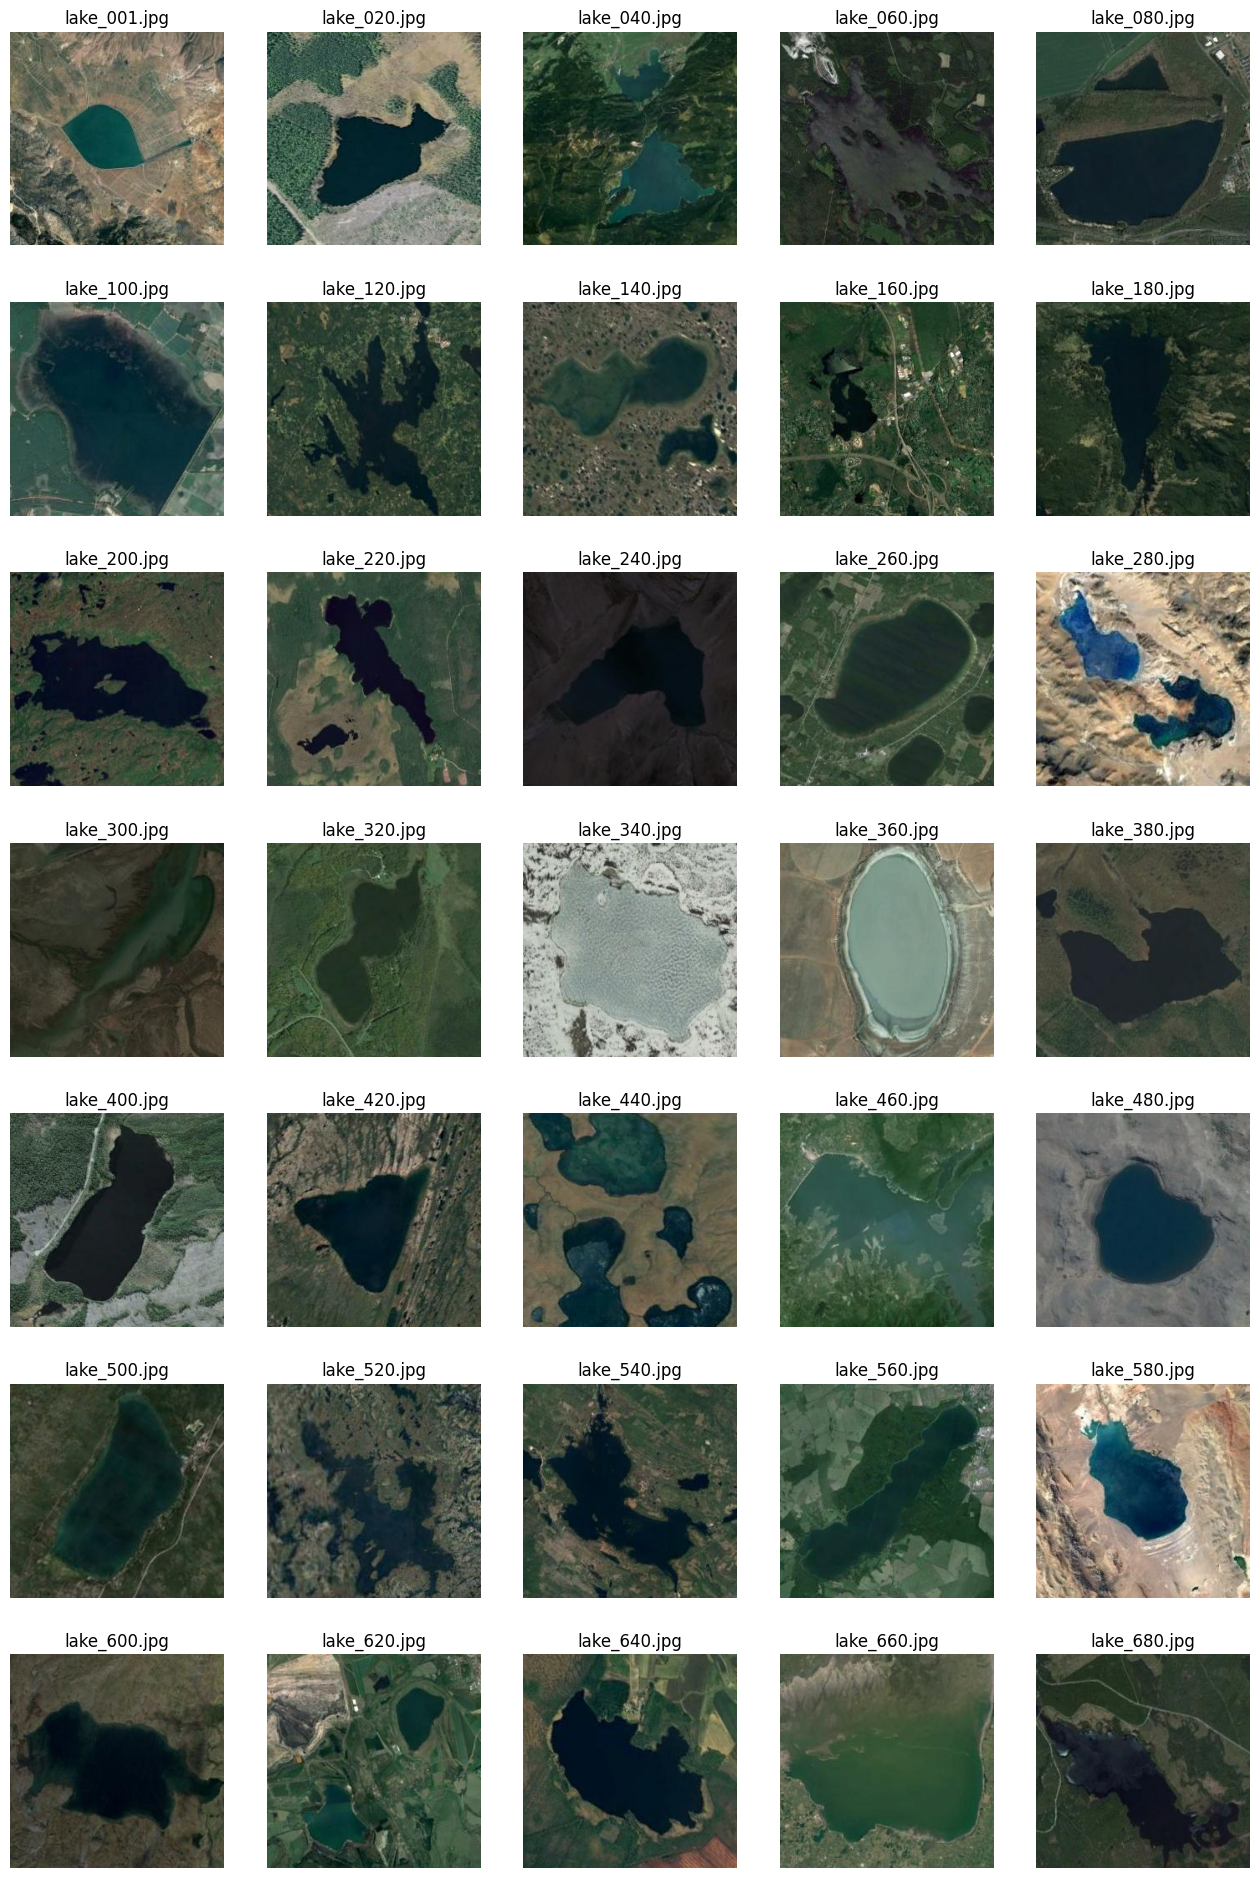

In [43]:
import skimage
#print(os.path.join(nwpu_dir,'lake','*.jpg'))
#print(nwpu_data)
#os.removedirs('NWPU-RESISC45')
#!ls NWPU-RESISC45/lake/
#!ls NWPU-RESISC45
#!ls drive/MyDrive/satellite/data/nwpu_images/
#!ls nwpu_data
#nwpu_data_exists
#!ls $nwpu_data
# visualize some of the NWPU examples
from skimage import io
fig = plt.figure(figsize=(16,24))
for i in range(1,700,100):
    #for j in range(i,i+99,20):
    for col in range(1,6):
        row = int(i%1000/100)+1
        idx = (row-1)*5 + col
        #print((row-1)*5 + col)
        #print(int(i%1000/100)+1)
        #print(col)
        plt.subplot(7,5,idx)
        #plt.subplot(7,5,int(idx%1000/100)+1)
        filename = F"lake_{(i-1)+(col-1)*20 if i>1 else 1 if col==1 else (col-1)*20:03d}.jpg"
        filepath = os.path.join(nwpu_data,filename)
        #print(filename)
        img = skimage.io.imread(filepath)
#        with rasterio.open(filepath) as dataset: #open the file
#            tmp = dataset.read().T #read in and transpose channels
        #print(type(tmp[0]))
        #print(int(i%1000/100)+1)
        #print(tmp.shape)
#        plt.imshow(tmp)
        plt.imshow(img)
        plt.title(filename)
        plt.axis('off')
plt.show()

In [44]:
toc = time.perf_counter()
print(f"Ran the whole shebang in {toc - tic:0.4f} seconds")
# High RAM, V100: Ran the whole shebang in 105.4674 seconds
# High RAM, A100: Ran the whole shebang in 148.2848 seconds
# High RAM, T4: Ran the whole shebang in 128.2261 seconds
# High RAM, TPU: Ran the whole shebang in 95.5862 seconds
# High RAM, No GPU: Ran the whole shebang in 90.7051 seconds  WWINNER (At least on single run)
# Low RAM, V100: Ran the whole shebang in 127.2304 seconds
# Low RAM, A100: Ran the whole shebang in 125.0288 seconds
# Low RAM, T4: Ran the whole shebang in 109.0424 seconds
# Low RAM, TPU: Ran the whole shebang in 158.0425 seconds
# Low RAM, No GPU:  Ran the whole shebang in 140.3454 seconds


Ran the whole shebang in 158.0425 seconds
